# Loading the image 

In [2]:
from sklearn.cluster import KMeans

In [3]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [5]:
image = 'Stones.jpg'  
image = Image.open(image)

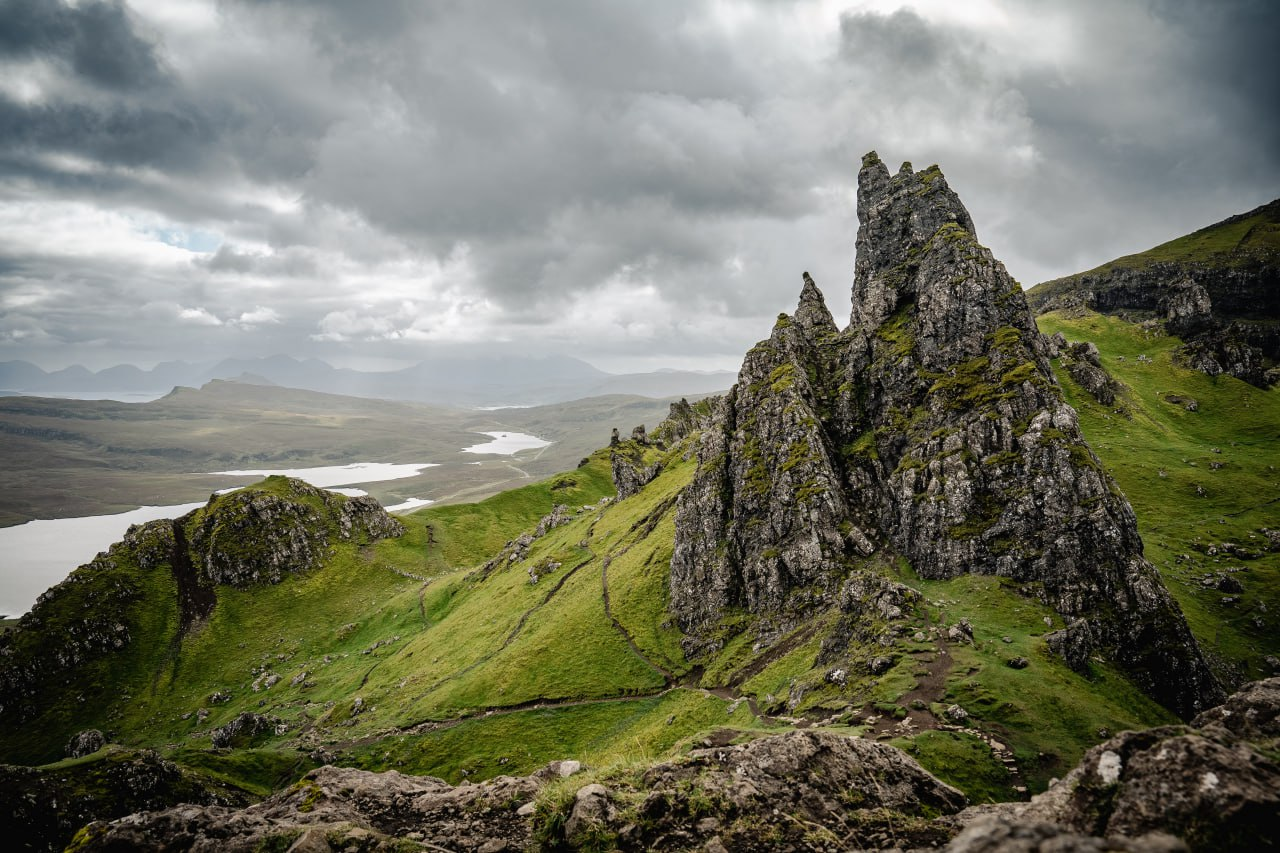

In [6]:
image

# converting the image to a vectore 

In [7]:
image_array = np.array(image)
image_array.shape

(853, 1280, 3)

# K_means Model

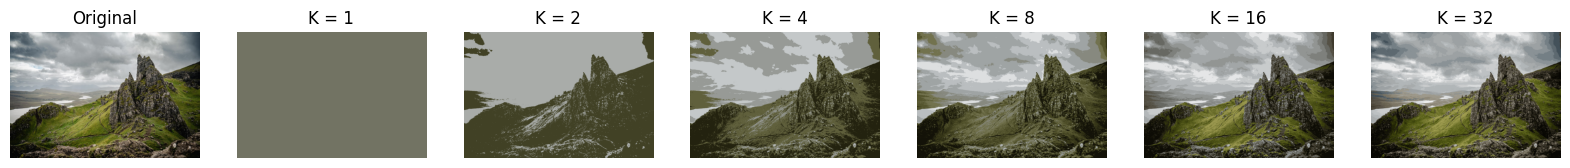

In [10]:
from sklearn.cluster import KMeans
import cv2

reshaped_image = image_array.reshape(-1, 3)
k_values = [1, 2, 4, 8, 16, 32]

fig, axes = plt.subplots(1, len(k_values) + 1, figsize=(20, 5))
axes[0].imshow(image)
axes[0].set_title('Original')
axes[0].axis('off')

for idx, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(reshaped_image)
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    quantized_image = np.zeros_like(reshaped_image)
    
    for i in range(len(quantized_image)):
        quantized_image[i] = cluster_centers[labels[i]]
    quantized_image_reshaped = quantized_image.reshape(image_array.shape)


    axes[idx + 1].imshow(quantized_image_reshaped)
    axes[idx + 1].set_title(f'K = {k}')
    axes[idx + 1].axis('off')

plt.show()